## L&T Vehicle Loan Default Prediction
Vehicle Loan Default Prediction

In [1]:
import numpy as np
import pandas as pd

train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
train_df.head(3)

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


### Initial data exploration

In [2]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  object 
 9   Employment.Type                      225493 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

In [3]:
train_df.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,...,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,...,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,...,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,...,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


In [4]:
train_df.describe(include='object')

,Date.of.Birth,Employment.Type,DisbursalDate,PERFORM_CNS.SCORE.DESCRIPTION,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH
count,233154,225493,233154,233154,233154,233154
unique,15433,2,84,20,192,294
top,01-01-88,Self employed,31-10-18,No Bureau History Available,0yrs 0mon,0yrs 0mon
freq,2173,127635,8826,116950,119373,119127


Check for nulls

In [5]:
train_df.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

__Employment.Type__ has two categories and a lot of nulls. We'll create a third _NaN_ category in Feature engineering

Check class skewness

In [22]:
train_df['loan_default'].value_counts()

0    182543
1     50611
Name: loan_default, dtype: int64

Data is skewed, there are much more class 0 than 1

### Feature Engineering

Let's deal with the non-numeric features first

In [68]:
from random import sample
from sklearn.utils import shuffle

def feature_engineering_1(df):
    
    def resample(df):
        indices_0 = df.index[df['loan_default'] == 0].tolist()
        indices_1 = df.index[df['loan_default'] == 1].tolist()
        indices_0 =  sample(indices_0, len(indices_1))
        df_0 = df.iloc[indices_0]
        df_1 = df.iloc[indices_1]
        df_resampled = pd.concat([df_0, df_1], ignore_index=True)
        return shuffle(df_resampled, random_state=0)

    def dob_convert(df):
        def func(row):
            yr = row[-2:]
            if int(yr)>= 20:
                age = 2020 - int('19'+yr)
            else:
                age = 2020 - int('20'+yr)
            return age
        df['Date.of.Birth'] = df['Date.of.Birth'].map(func)
        return df

    def one_hot_convert(df):
        return pd.get_dummies(df,columns=['Employment.Type','PERFORM_CNS.SCORE.DESCRIPTION'],
                             dummy_na=True)  # this fixes the nan in 'Employment.Type'

    def acct_age(df):
        def convert(row):
            yr, mon = row.split(' ')
            return float(yr.strip('yrs')) + float(mon.strip('mon'))/12
        df['AVERAGE.ACCT.AGE'] = df['AVERAGE.ACCT.AGE'].map(convert)
        df['CREDIT.HISTORY.LENGTH'] = df['CREDIT.HISTORY.LENGTH'].map(convert)
        return df
    
    to_drop = ['DisbursalDate','UniqueID','branch_id','supplier_id','Current_pincode_ID','manufacturer_id',
              'State_ID','Employee_code_ID']
    df = df.drop(to_drop,axis=1)
    new_df = dob_convert(acct_age(one_hot_convert(resample(df))))
    return new_df
    

Let's apply convertions

In [30]:
train_df_1 = feature_engineering_1(train_df)
train_df_1.shape

(101222, 55)

In [31]:
from sklearn.model_selection import train_test_split

X = train_df_1.drop(['loan_default'],axis=1)
y = train_df_1['loan_default']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2) 
X_train.shape

(80977, 54)

### Modelling

In [32]:
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.decomposition import PCA

scaler = MinMaxScaler()
pca = PCA(n_components = 20)
xgc = XGBClassifier()#n_estimators=200, learning_rate=0.01, gamma=0, max_depth=3)
mlp = MLPClassifier(alpha=1, max_iter=500)
gnb = GaussianNB()
rfc =  RandomForestClassifier(max_depth=5, n_estimators=100)

pipeline = Pipeline(steps=[('transform',pca),('Scale',scaler),('Classifier',xgc)])

model = pipeline.fit(X_train,y_train)

In [33]:
from sklearn import metrics

y_pred = model.predict(X_val)

print(metrics.classification_report(y_val, y_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.60      0.55      0.57     10243
           1       0.58      0.63      0.60     10002

    accuracy                           0.59     20245
   macro avg       0.59      0.59      0.59     20245
weighted avg       0.59      0.59      0.59     20245



In [42]:
def metric(y_true,y_pred):
    indices_tp = np.where(y_true==1)
    predict_1 = y_pred[indices_tp]
    tp = sum(predict_1==1)
    fn = sum(predict_1==0)
    
    indices_tn = np.where(y_true==0)
    predict_0 = y_pred[indices_tn]
    tn = sum(predict_0==0)
    fp = sum(predict_0==1)
    
    print('Summary:')
    print('-------')
    print('%3.2f percent of defaulters predicted correctly'%(tp/len(predict_1)*100))
    print('%3.2f percent of defaulters misclassified as non-defaulter'%(fn/len(predict_1)*100))
    print('%3.2f percent of non-defaulters predicted correctly'%(tn/len(predict_0)*100))
    print('%3.2f percent of non-defaulters misclassified as defaulter'%(fp/len(predict_0)*100))
    print('Acc. -- %3.2f percent'%((tp+tn)/(tp+tn+fn+fp)*100))
    print('F1 score -- %2.2f'%(2*tp/(2*tp+fn+fp)))
    
metric(y_val,y_pred)

Summary:
-------
63.23 percent of defaulters predicted correctly
36.77 percent of defaulters misclassified as non-defaulter
54.75 percent of non-defaulters predicted correctly
45.25 percent of non-defaulters misclassified as defaulter
Acc. -- 58.94 percent
F1 score -- 0.60


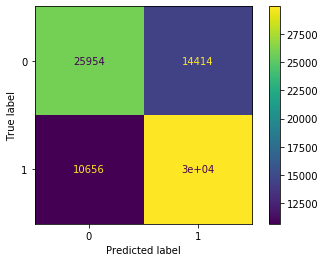

In [35]:
metrics.plot_confusion_matrix(model,X_train,y_train)

#### Outliers removal

In [56]:
def outlier_removal(df,col):
    q3 = df[col].quantile(0.75)
    q1 = df[col].quantile(0.25)
    price_ub = q3 + 1.5*(q3-q1)      # upper bound
    price_lb = q1 - 1.5*(q3-q1)     # lower bound
    df_new = df[df[col] < price_ub]
    print('removed outliers: ',df.shape[0]-df_new.shape[0])
    return df_new

In [79]:
columns = train_df.describe().columns   # select numeric columns only
columns = columns[[1,2,6,8]]
df_no_outliers = train_df.copy()
for col in columns:
    df_no_outliers = outlier_removal(df_no_outliers,col)
df_no_outliers = df_no_outliers.reset_index(drop=True)

removed outliers:  7248
removed outliers:  19719
removed outliers:  0
removed outliers:  1380


In [84]:
train_df_2 = feature_engineering_1(df_no_outliers)
X2 = train_df_2.drop(['loan_default'],axis=1)
y2 = train_df_2['loan_default']
X_train2, X_val2, y_train2, y_val2 = train_test_split(X2, y2, test_size=0.3, random_state=2) 
X_train2.shape

(61678, 54)

In [85]:
pipeline2 = Pipeline(steps=[('transform',pca),('Scale',scaler),('Classifier',xgc)])
model2 = pipeline2.fit(X_train2,y_train2)

In [86]:
y_pred2 = model2.predict(X_val2)
metric(y_val2,y_pred2)

Summary:
-------
64.92 percent of defaulters predicted correctly
35.08 percent of defaulters misclassified as non-defaulter
52.67 percent of non-defaulters predicted correctly
47.33 percent of non-defaulters misclassified as defaulter
Acc. -- 58.75 percent
F1 score -- 0.61


### DNN Model

In [49]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
seed = 10
np.random.seed(seed)

dnn_model = Sequential()

dnn_model.add(Dense(300, input_shape=(X_train.shape[1],), activation='relu'))
dnn_model.add(Dense(100, activation = 'relu'))
dnn_model.add(Dense(1, activation='sigmoid'))

dnn_model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.001),
                 metrics=['accuracy'])

In [45]:
sc = MinMaxScaler().fit(X_train)
scaled_X = sc.transform(X_train)
sc_Xt = sc.transform(X_val)

In [50]:
dnn_model.fit(scaled_X,y_train, batch_size=100, epochs=10, verbose=1)

Epoch 1/10
810/810 [==============================] - 3s 3ms/step - loss: 0.6752 - accuracy: 0.5755
Epoch 2/10
810/810 [==============================] - 3s 4ms/step - loss: 0.6694 - accuracy: 0.5878
Epoch 3/10
810/810 [==============================] - 2s 3ms/step - loss: 0.6678 - accuracy: 0.5911
Epoch 4/10
810/810 [==============================] - 3s 4ms/step - loss: 0.6669 - accuracy: 0.5929
Epoch 5/10
810/810 [==============================] - 3s 4ms/step - loss: 0.6666 - accuracy: 0.5938
Epoch 6/10
810/810 [==============================] - 3s 4ms/step - loss: 0.6657 - accuracy: 0.5940
Epoch 7/10
810/810 [==============================] - 4s 4ms/step - loss: 0.6653 - accuracy: 0.5956
Epoch 8/10
810/810 [==============================] - 3s 3ms/step - loss: 0.6649 - accuracy: 0.5955
Epoch 9/10
810/810 [==============================] - 3s 4ms/step - loss: 0.6645 - accuracy: 0.5958
Epoch 10/10
810/810 [==============================] - 3s 4ms/step - loss: 0.6641 - accuracy: 0.5956

In [51]:
my_pred = dnn_model.predict(sc_Xt)

print(metrics.classification_report(y_val, y_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.60      0.55      0.57     10243
           1       0.58      0.63      0.60     10002

    accuracy                           0.59     20245
   macro avg       0.59      0.59      0.59     20245
weighted avg       0.59      0.59      0.59     20245

